In [32]:
import pandas as pd
import numpy as np
from numpy.random import normal as normal
from math import cos, sin
from matplotlib import animation

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

from matplotlib import pyplot as plt

In [44]:
bodies = []
for x in range(1000):
    bodies.append()

print('mean', np.mean(bodies))
print('std', np.std(bodies))

bodies[0]

mean 4.934599348621638
std 2.488698026788792


array([5.39549371, 4.06628576, 5.55229703, 2.4466501 , 5.56959695])

In [57]:
def randomConfig(mass, number_of_dim, test, test_counter):
    # for dim == 2 return [mass, px, py, vx, vy], note that p stands for position not momenta
    if test:
        if test_counter == 0:
            print('initialize body ', test_counter)
            return np.array([mass, 1, -1, 0,  2.5]) # body1
        elif test_counter == 1:
            print('initialize body ', test_counter)
            return np.array([mass, -1, 1, 2.5, 0]) # body2
        else:
            print('initialize body ', test_counter)
            return np.array([mass, -0, 0, -1.5,  -1.5]) # body3
    else:
        print('initialize body ', test_counter+1)
        body = np.squeeze(normal(5, 2.5, size=(1, 5)))
        body[0] = mass
        return body
        
        # return random config
        # for dim=2 [mass, px, py, vx, vy]
        # or dim=3 [mass, px, py, pz, vx, vy, vz]

In [15]:
def get_accelerations(state, epsilon=0):
    G = 1
    # shape of state is [bodies x properties]
    net_accs = [] # [nbodies x 2]
    for i in range(state.shape[0]): # number of bodies
        other_bodies = np.concatenate([state[:i, :], state[i+1:, :]], axis=0)
        displacements = other_bodies[:, 1:3] - state[i, 1:3] # indexes 1:3 -> pxs, pys
        distances = (displacements**2).sum(1, keepdims=True)**0.5 # shape=(2,1) consist of euclidian distances from particles j to particle i
        masses = other_bodies[:, 0:1] # index 0 -> mass
        pointwise_accs = G *  masses * displacements / (distances**3 + epsilon) # G=1
        net_acc = pointwise_accs.sum(0, keepdims=True)
        net_accs.append(net_acc)
    net_accs = np.concatenate(net_accs, axis=0)
    return net_accs

In [16]:
def update(t, state):
    #print(state)
    state = state.reshape(-1,5) # [bodies, properties]
    deriv = np.zeros_like(state)
    deriv[:,0] = 2.
    deriv[:,1:3] = state[:,3:5] # dx, dy = vx, vy for all bodies
    deriv[:,3:5] = get_accelerations(state) 

    return deriv.reshape(-1)

In [17]:
nbodies = 3
ndim = 2
mass = 1

# time intervall
t_span = [0,20]
t_points = 5000
t_eval = np.linspace(t_span[0], t_span[1], t_points)
h = (t_span[1] - t_span[0]) / (t_points - 1)

In [18]:
# get solution from solve_ivp      
path = solve_ivp(fun=update, t_span=t_span, y0=states[0,:,:].flatten(), t_eval=t_eval)

orbit = path['y'].reshape(nbodies, 5, path['t'].shape[0])
print('found {} solutions for times: {}'.format(path['t'].shape[0], path['t']))

found 145 solutions for times: [0.         0.0040008  0.0080016  0.0120024  0.0160032  0.020004
 0.0240048  0.0280056  0.0320064  0.0360072  0.040008   0.0440088
 0.0480096  0.0520104  0.0560112  0.060012   0.0640128  0.0680136
 0.0720144  0.0760152  0.080016   0.0840168  0.0880176  0.0920184
 0.0960192  0.10002    0.1040208  0.1080216  0.1120224  0.1160232
 0.120024   0.1240248  0.12802561 0.13202641 0.13602721 0.14002801
 0.14402881 0.14802961 0.15203041 0.15603121 0.16003201 0.16403281
 0.16803361 0.17203441 0.17603521 0.18003601 0.18403681 0.18803761
 0.19203841 0.19603921 0.20004001 0.20404081 0.20804161 0.21204241
 0.21604321 0.22004401 0.22404481 0.22804561 0.23204641 0.23604721
 0.24004801 0.24404881 0.24804961 0.25205041 0.25605121 0.26005201
 0.26405281 0.26805361 0.27205441 0.27605521 0.28005601 0.28405681
 0.28805761 0.29205841 0.29605921 0.30006001 0.30406081 0.30806161
 0.31206241 0.31606321 0.32006401 0.32406481 0.32806561 0.33206641
 0.33606721 0.34006801 0.34406881 0.3

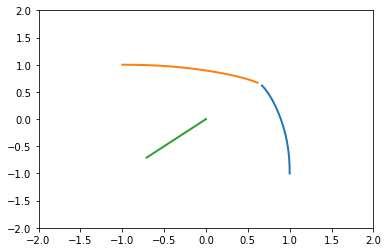

In [19]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
line3, = ax.plot([], [], lw=2)

frame_num = orbit[0,1,:].shape[0]
particles = np.array([
    orbit[0,1,:],
    orbit[0,2,:],
    orbit[1,1,:],
    orbit[1,2,:],
    orbit[2,1,:],
    orbit[2,2,:]])

# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return [line1, line2, line3]

x1, x2, y1, y2, x3, y3 = [], [], [], [], [], []
# animation function.  This is called sequentially
def animate(i):
    x1.append(particles[0][i])
    y1.append(particles[1][i])
    x2.append(particles[2][i])
    y2.append(particles[3][i])
    x3.append(particles[4][i])
    y3.append(particles[5][i])
    
    line1.set_data(x1, y1)
    line2.set_data(x2, y2)
    line3.set_data(x3, y3)
    return [line1, line2, line3]

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frame_num, interval=50, blit=True)

anim.save('solve_ivp.mp4')
plt.show()

In [80]:
# define important parameters

G = 5.
nbodies = 5
ndim = 2
mass = 2

In [ ]:
def get_accelerations2(state, epsilon=0.0001):
    
    nbodies = state.shape[0]
    
    net_accs = []
    
    for i in range(nbodies):
        #print('--> compute all for body ', i)
        
        # get all bodies except body i
        other_bodies = np.concatenate([state[:i,:], state[i+1:,:]], axis=0)
        
        
        # compute displacements 
        displacements = other_bodies[:,1:3] - state[i,1:3]
        
        
        # compute distances
        distances = (displacements**2).sum(1, keepdims=True)**0.5
         
        # get masess
        masses = other_bodies[:,0:1].reshape(nbodies - 1, -1)

        
        # compute pointwise accelerations        
        pointwise_accs = G * masses * displacementsccs1  / (distances**3 + epsilon) 

        
        # compute net_acc's (accleration of body i in each dim)
        net_acc = pointwise_accs.sum(0, keepdims=True)
        #print('net_acc \n', net_acc)
        
        net_accs.append(net_acc)

    net_accs = np.concatenate(net_accs, axis=0)
    
    return net_accs

In [ ]:
def update_states(t, state):

    #print('update_states:state \n', state)
    state = state.reshape(-1, 2 * ndim + 1)

    
    #print('update_states:state \n', state)
    
    #print('   m0,  px,  py,  vx,  vy')
    derivs = np.zeros_like(state)
    #derivs[:,0] = state[:,0]
    derivs[:,1:3] = state[:,3:5]
    
    
    derivs[:,3:5] = get_accelerations2(state)

    
      

    #print('derivs \n', derivs)
    
    return derivs.reshape(-1)

In [141]:
def rk4(func, y0, t, h):
    
    #print('rk4:y0 \n', y0)
    
    y_next = np.zeros_like(y0)
    
    #return 0
    
    k1 = func(t, y0)    
    #print('k1 \n', k1)
    
    k2 = func(t + h * 0.5, y0 + k1 * 0.5 * h)    
    #print('k2 \n', k2)
    
    k3 = func(t + h * 0.5, y0 + k2 * 0.5 * h)
    #print('k3 \n', k3)
    
    k4 = func(t + h, y0 + k3 * h)
    #print('k4 \n', k4)
    
    v = y0 + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

    # p doesn't explicitly depend on other variables
    k1 = k2 = k3 = k4 = v

    p = y0 + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    #print('v \n', v)
    #print('p \n', p)
    
    y0 = y0.reshape(-1, 2 * ndim + 1)
    v = v.reshape(-1, 2 * ndim + 1)
    p = p.reshape(-1, 2 * ndim+ 1)    
    y_next = y_next.reshape(-1, 2 * ndim + 1)
    
    # overtake mass
    y_next[:,0] = y0[:,0]
    
    # update velocities
    y_next[:,3:] = v[:,3:]
    
    # update positions
    y_next[:,1:3] = v[:,1:3]
    #print('y_next \n', y_next)
    
    return y_next
    #return np.array([u, v])

In [ ]:
# time intervall
t_span = [0,20]
t_points = 500
t_eval = np.linspace(t_span[0], t_span[1], t_points)
h = (t_span[1] - t_span[0]) / (t_points - 1)

states = np.zeros(shape=(t_points+1, nbodies, 2 * ndim + 1)) #2 because of postion and velocity, +1 because of mass

# initializing state0
for i in range(states.shape[1]):
    print(i)
    states[0,i,:] = randomConfig(mass, ndim, False, i)
    
print('y0: \n', states[0,:,:])
print('y0: \n', states[0,:,:])

# get solution from rk4
progress = []

# build the driver
for step in range(len(t_eval)):
    percents = int(t_eval[step] / t_eval[-1]  * 100)
    if percents % 10 == 0:
        if percents not in progress:
            progress.append(percents)
            print('{}%, '.format(percents))
    
    states[step+1] = rk4(update_states, states[step].flatten(), t_eval[step], h)

0
initialize body  1
1
initialize body  2
2
initialize body  3
3
initialize body  4
4
initialize body  5
y0: 
 [[2.         3.79493867 2.65035485 9.76941353 5.34287138]
 [2.         5.13325211 5.275235   5.55342594 6.95623424]
 [2.         4.86446035 4.69787719 5.57021239 5.84359684]
 [2.         7.76579034 7.05726529 5.1346338  6.74594122]
 [2.         4.86678093 1.3027899  1.28367836 5.00660707]]
y0: 
 [[2.         3.79493867 2.65035485 9.76941353 5.34287138]
 [2.         5.13325211 5.275235   5.55342594 6.95623424]
 [2.         4.86446035 4.69787719 5.57021239 5.84359684]
 [2.         7.76579034 7.05726529 5.1346338  6.74594122]
 [2.         4.86678093 1.3027899  1.28367836 5.00660707]]
0%, 
update_states:state 
 [2.         3.79493867 2.65035485 9.76941353 5.34287138 2.
 5.13325211 5.275235   5.55342594 6.95623424 2.         4.86446035
 4.69787719 5.57021239 5.84359684 2.         7.76579034 7.05726529
 5.1346338  6.74594122 2.         4.86678093 1.3027899  1.28367836
 5.00660707]
o

 [ 3.28540938  5.89701643]]
displacements.shape
 (4, 2)
pointwise acc 
 [[-0.76625083  5.2840497 ]
 [ 0.09656781  0.59268858]
 [ 0.10458527  0.77039809]
 [ 0.1068044   0.19170436]]
update_states:state 
 [ 2.          4.79146671  3.18292612 10.07384659  5.24949452  2.
  5.6385871   5.84467664  4.50512216  4.21755937  2.          5.4738055
  5.39393036  6.62510386  8.25255407  2.          8.27157155  7.72567204
  4.96787146  6.60055258  2.          4.98640116  1.83183317  1.13941995
  5.57509021]
other_bodies 
 [[2.         5.6385871  5.84467664 4.50512216 4.21755937]
 [2.         5.4738055  5.39393036 6.62510386 8.25255407]
 [2.         8.27157155 7.72567204 4.96787146 6.60055258]
 [2.         4.98640116 1.83183317 1.13941995 5.57509021]]
displacements 
 [[ 0.84712038  2.66175051]
 [ 0.68233879  2.21100424]
 [ 3.48010484  4.54274591]
 [ 0.19493444 -1.35109295]]
distances 
 [[2.79330069]
 [2.31389843]
 [5.72255801]
 [1.365083  ]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]

 [4.00065726]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]
 [2.]
 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[-0.3002405  -2.59793895]
 [ 0.02144434 -0.12179799]
 [ 2.6575357   2.08284162]
 [-0.99995123 -3.87367475]]
displacements.shape
 (4, 2)
pointwise acc 
 [[-1.67856001e-01 -1.45243445e+00]
 [ 1.07679047e+02 -6.11587549e+02]
 [ 6.90365790e-01  5.41073673e-01]
 [-1.56165141e-01 -6.04962471e-01]]
other_bodies 
 [[ 2.          5.80369017  3.69908595 10.07117066  5.0662047 ]
 [ 2.          6.12537501  6.17522692  6.34741306  6.80256101]
 [ 2.          6.10393067  6.2970249   4.82444474  5.33920061]
 [ 2.          5.10397944  2.42335015  1.2641564   6.23713734]]
displacements 
 [[-2.9577762  -4.68078057]
 [-2.63609136 -2.2046396 ]
 [-2.6575357  -2.08284162]
 [-3.65748692 -5.95651637]]
distances 
 [[5.53697993]
 

other_bodies 
 [[ 2.          7.00083317  4.31322018  9.85699028  5.25424752]
 [ 2.          7.29132878  5.58532704 10.64653399 -7.3633518 ]
 [ 2.          9.327501    9.14453871  4.61230458  6.27402106]
 [ 2.          5.27716172  3.20483828  1.61724043  6.70365513]]
displacements 
 [[ 0.71528465 -4.00802937]
 [ 1.00578026 -2.73592251]
 [ 3.04195248  0.82328916]
 [-1.0083868  -5.11641127]]
distances 
 [[4.07135501]
 [2.91493841]
 [3.15139333]
 [5.2148354 ]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]
 [2.]
 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[ 0.71528465 -4.00802937]
 [ 1.00578026 -2.73592251]
 [ 3.04195248  0.82328916]
 [-1.0083868  -5.11641127]]
displacements.shape
 (4, 2)
pointwise acc 
 [[ 0.10598913 -0.59390001]
 [ 0.4060815  -1.10462251]
 [ 0.97194839  0.26305295]
 [-0.0711058  -0.36078072]]
other

 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[-1.76525539 -4.86519428]
 [-3.43290807  0.45235918]
 [-1.46627515 -4.98131733]
 [-4.33026844 -5.8810073 ]]
displacements.shape
 (4, 2)
pointwise acc 
 [[-0.12733258 -0.35093945]
 [-0.82691381  0.10896361]
 [-0.10472518 -0.35577863]
 [-0.11116449 -0.15097428]]
other_bodies 
 [[ 2.          8.01748258  4.90277564 11.94995131  7.31442869]
 [ 2.          6.3498299  10.2203291   0.69972665 18.89917295]
 [ 2.          8.31646282  4.7866526   8.30098607 -9.38707419]
 [ 2.          9.78273797  9.76796992  4.47455515  6.17452954]]
displacements 
 [[2.56501305 1.01581301]
 [0.89736037 6.33336648]
 [2.86399329 0.89968997]
 [4.33026844 5.8810073 ]]
distances 
 [[2.75883454]
 [6.39662306]
 [3.00198261]
 [7.30325075]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]
 [2.]
 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
dista

G * masses shape 
 (4, 1)
displacements 
 [[ 2.98883841 -6.75984401]
 [ 2.51495378 -7.97410916]
 [ 3.8013894  -1.7262942 ]
 [-0.7715697  -7.52753162]]
displacements.shape
 (4, 2)
pointwise acc 
 [[ 0.07402385 -0.16741945]
 [ 0.04302371 -0.13641434]
 [ 0.52236164 -0.23721586]
 [-0.01780774 -0.17373458]]
other_bodies 
 [[ 2.          9.41323452  5.34975299 13.76489323  3.67047411]
 [ 2.          6.42439611 12.10959699  0.77900856 18.81758838]
 [ 2.         10.22578551 10.38330279  4.37987851  6.11351148]
 [ 2.          5.65282641  4.58206537  2.09191719  6.96246186]]
displacements 
 [[ 0.47388463  1.21426515]
 [-2.51495378  7.97410916]
 [ 1.28643562  6.24781495]
 [-3.28652348  0.44657754]]
distances 
 [[1.30345943]
 [8.36130428]
 [6.37887986]
 [3.31672551]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]
 [2.]
 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * m

G * masses shape 
 (4, 1)
displacements 
 [[ 4.91126244  0.4212908 ]
 [ 0.6351222   8.71098726]
 [ 3.70416598 -1.69284981]
 [ 4.79129996  5.71254826]]
displacements.shape
 (4, 2)
pointwise acc 
 [[ 0.41005055  0.03517436]
 [ 0.00953238  0.13074086]
 [ 0.5483455  -0.2506007 ]
 [ 0.11560085  0.13782803]]
update_states:state 
 [ 2.         11.05344603  5.77095303 13.54867092  3.41132731  2.
  6.52176    14.36761161  0.83503326 18.74476285  2.          9.70163394
  3.48083023  6.36470449 -5.2962809   2.         10.74800345 11.11485001
  4.31313799  6.05625124  2.          5.91468055  5.42058043  2.24981737
  6.97919024]
other_bodies 
 [[ 2.          6.52176    14.36761161  0.83503326 18.74476285]
 [ 2.          9.70163394  3.48083023  6.36470449 -5.2962809 ]
 [ 2.         10.74800345 11.11485001  4.31313799  6.05625124]
 [ 2.          5.91468055  5.42058043  2.24981737  6.97919024]]
displacements 
 [[-4.53168603  8.59665858]
 [-1.35181209 -2.2901228 ]
 [-0.30544258  5.34389699]
 [-5.138765

 [-4.19587617  3.16285231]]
displacements.shape
 (4, 2)
pointwise acc 
 [[ 0.38575611  0.58870371]
 [-0.01420262  0.05054488]
 [ 0.01229067  0.12847207]
 [-0.28923182  0.21802301]]
other_bodies 
 [[ 2.         12.40613372  6.10992717 13.45532878  3.36439535]
 [ 2.          6.60687449 16.24359734  0.86269009 18.70037771]
 [ 2.         10.34023672  2.95715473  6.3796144  -5.16525906]
 [ 2.          6.14436054  6.12000704  2.33190368  6.98082458]]
displacements 
 [[ 1.22760558 -5.60972798]
 [-4.57165364  4.5239422 ]
 [-0.83829142 -8.76250041]
 [-5.03416759 -5.5996481 ]]
distances 
 [[5.74247886]
 [6.43164598]
 [8.80250794]
 [7.52986734]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]
 [2.]
 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[ 1.22760558 -5.60972798]
 [-4.57165364  4.5239422 ]
 [-0.83829142 -8.76250041]
 [-5.

 [-7.36982745  0.3732717 ]]
displacements.shape
 (4, 2)
pointwise acc 
 [[-0.02782526  0.04601359]
 [-0.24021798 -0.34695045]
 [-0.08769507  0.24022128]
 [-0.18340715  0.00928932]]
other_bodies 
 [[ 2.         13.75093369  6.44628708 13.39276089  3.35264765]
 [ 2.         10.97987798  2.44400959  6.38674066 -5.08576484]
 [ 2.         11.60652158 12.32043081  4.2631243   5.97887704]
 [ 2.          6.38110623  6.81955879  2.38823636  6.98242785]]
displacements 
 [[  7.05662995 -11.66928417]
 [  4.28557424 -15.67156166]
 [  4.91221785  -5.79514044]
 [ -0.3131975  -11.29601246]]
distances 
 [[13.63701651]
 [16.24696869]
 [ 7.5969426 ]
 [11.30035355]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]
 [2.]
 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[  7.05662995 -11.66928417]
 [  4.28557424 -15.67156166]
 [  4.91221785  

 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[ 8.46759864 -0.73726401]
 [ 0.16049212 12.46525514]
 [ 4.99737161 -5.58189358]
 [ 5.41027379  5.39849134]]
displacements.shape
 (4, 2)
pointwise acc 
 [[ 0.13789847 -0.01200666]
 [ 0.0008284   0.06434127]
 [ 0.11883226 -0.13273158]
 [ 0.12118117  0.12091726]]
update_states:state 
 [ 2.         15.35777331  6.84925209 13.33702656  3.35126126  2.
  6.80110737 20.35818612  0.89505808 18.63650893  2.         11.74818061
  1.83664362  6.39234246 -5.02084516  2.         12.11818176 13.0370427
  4.24845239  5.94180631  2.          6.67143172  7.65935232  2.43848454
  6.98651941]
other_bodies 
 [[ 2.          6.80110737 20.35818612  0.89505808 18.63650893]
 [ 2.         11.74818061  1.83664362  6.39234246 -5.02084516]
 [ 2.         12.11818176 13.0370427   4.24845239  5.94180631]
 [ 2.          6.67143172  7.65935232  2.43848454  6.98651941]]
displacements 
 [[-8.55666594 13.50893404]
 [-3.6095927  -5

 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[  4.14891681  -6.44596474]
 [ -5.65219141   8.59346681]
 [ -0.15455373 -12.29557994]
 [ -5.62599997  -5.27147747]]
displacements.shape
 (4, 2)
pointwise acc 
 [[ 0.09210176 -0.1430939 ]
 [-0.0519421   0.07897162]
 [-0.00083125 -0.06613008]
 [-0.12276585 -0.11502976]]
other_bodies 
 [[ 2.         16.69233935  7.18514492 13.30082871  3.35354085]
 [ 2.          6.89123113 22.22457647  0.9037124  18.61660481]
 [ 2.         12.38886881  1.33552972  6.39577876 -4.98173708]
 [ 2.         12.54342254 13.63110966  4.23931643  5.91536505]]
displacements 
 [[ 9.77491678 -1.17448728]
 [-0.02619144 13.86494428]
 [ 5.47144624 -7.02410248]
 [ 5.62599997  5.27147747]]
distances 
 [[ 9.84522313]
 [13.86496902]
 [ 8.90363631]
 [ 7.70975683]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]

 [15.02974923]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]
 [2.]
 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[ 11.04137115 -16.5677742 ]
 [  6.04773644 -23.25112146]
 [  5.98564611  -9.8664929 ]
 [  0.18445013 -15.02861737]]
displacements.shape
 (4, 2)
pointwise acc 
 [[ 0.01399    -0.02099224]
 [ 0.00436129 -0.01676741]
 [ 0.03894698 -0.0641986 ]
 [ 0.00054328 -0.04426534]]
other_bodies 
 [[ 2.         18.02350919  7.5213288  13.27145415  3.35659718]
 [ 2.          6.98213804 24.089103    0.91024593 18.60052614]
 [ 2.         12.96778415 14.2226101   4.23136184  5.89241922]
 [ 2.          7.16658817  9.06048563  2.49981457  6.99745051]]
displacements 
 [[ 4.99363471  6.68334726]
 [-6.04773644 23.25112146]
 [-0.06209032 13.38462856]
 [-5.8632863   8.22250409]]
distances 
 [[ 8.3428723 ]
 [24.02477398]
 [13.384

displacements.shape
 (4, 2)
pointwise acc 
 [[ 0.06762044 -0.01078966]
 [-0.00081184  0.03812418]
 [ 0.04327275 -0.06518424]
 [ 0.1248214   0.10553291]]
update_states:state 
 [ 2.         19.61747182  7.92514573 13.24243106  3.36017018  2.
  7.09196808 26.32465615  0.91633149 18.5847168   2.         13.7993952
  0.24435649  6.40111094 -4.92336817  2.         13.47601201 14.9296369
  4.22217061  5.86834882  2.          7.46897845  9.90233312  2.52931993
  7.00538311]
other_bodies 
 [[ 2.          7.09196808 26.32465615  0.91633149 18.5847168 ]
 [ 2.         13.7993952   0.24435649  6.40111094 -4.92336817]
 [ 2.         13.47601201 14.9296369   4.22217061  5.86834882]
 [ 2.          7.46897845  9.90233312  2.52931993  7.00538311]]
displacements 
 [[-12.52550374  18.39951042]
 [ -5.81807662  -7.68078924]
 [ -6.14145981   7.00449117]
 [-12.14849338   1.97718739]]
distances 
 [[22.25826201]
 [ 9.63558711]
 [ 9.31560117]
 [12.30833706]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[

displacements.shape
 (4, 2)
pointwise acc 
 [[ 0.06812463 -0.07015681]
 [-0.02277608  0.04297459]
 [ 0.00138135 -0.0401655 ]
 [-0.1256929  -0.09998453]]
other_bodies 
 [[ 2.         20.94336937  8.26196648 13.22224614  3.36281829]
 [ 2.          7.18398604 28.18630939  0.9203661  18.57375695]
 [ 2.         14.44087818 -0.24801773  6.40290612 -4.90428872]
 [ 2.         13.89870295 15.51677817  4.21439202  5.85061913]]
displacements 
 [[ 13.21987072  -2.34264172]
 [ -0.53951261  17.5817012 ]
 [  6.71737954 -10.85262592]
 [  6.1752043    4.91216998]]
distances 
 [[13.42583152]
 [17.58997701]
 [12.76333331]
 [ 7.89066297]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]
 [2.]
 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[ 13.21987072  -2.34264172]
 [ -0.53951261  17.5817012 ]
 [  6.71737954 -10.85262592]
 [  6.1752043  

 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[ 14.99094163 -21.44786566]
 [  7.80614779 -30.78549025]
 [  7.04418388 -13.94474011]
 [  0.7038474  -18.73929242]]
displacements.shape
 (4, 2)
pointwise acc 
 [[ 0.00836645 -0.01197006]
 [ 0.00243672 -0.0096098 ]
 [ 0.0184732  -0.03656975]
 [ 0.00106733 -0.0284168 ]]
other_bodies 
 [[ 2.         22.26732645  8.59904415 13.20506619  3.36510128]
 [ 2.          7.27638482 30.04690981  0.92367868 18.56444009]
 [ 2.         14.3205687  16.1021697   4.20631423  5.83470427]
 [ 2.          7.98023222 11.30761739  2.5718909   7.01944395]]
displacements 
 [[ 7.18479384  9.33762459]
 [-7.80614779 30.78549025]
 [-0.7619639  16.84075014]
 [-7.10230038 12.04619783]]
distances 
 [[11.78187148]
 [31.75975996]
 [16.85797895]
 [13.98404637]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]
 [2.]
 [2.]]
masses.shape, 
 (4, 1)
displacements.s

 [[28.51058028]
 [13.06572964]
 [11.93031384]
 [15.87840074]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]
 [2.]
 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[-16.46636642  23.27470654]
 [ -8.00132278 -10.329188  ]
 [ -9.02828684   7.79887333]
 [-15.56314727   3.14834197]]
displacements.shape
 (4, 2)
pointwise acc 
 [[-0.00710525  0.01004306]
 [-0.03587243 -0.04630897]
 [-0.05316793  0.04592786]
 [-0.0388756   0.00786433]]
other_bodies 
 [[ 2.         23.85401993  9.00380922 13.18741177  3.36742063]
 [ 2.         15.85269715 -1.32537878  6.40594512 -4.87245219]
 [ 2.         14.82573309 16.80268255  4.19617177  5.81746386]
 [ 2.          8.29087266 12.15215119  2.59484954  7.02795605]]
displacements 
 [[ 16.46636642 -23.27470654]
 [  8.46504364 -33.60389454]
 [  7.43807958 -15.47583322]
 [  0.90321915 -20.1263645

 [ -6.6940133   -4.52826446]]
displacements.shape
 (4, 2)
pointwise acc 
 [[ 0.04758656 -0.03855064]
 [-0.01233473  0.02661088]
 [ 0.00175386 -0.02696108]
 [-0.12681399 -0.0857852 ]]
other_bodies 
 [[ 2.         25.17477813  9.34130676 13.17470547  3.36905066]
 [ 2.          7.48065277 34.13738053  0.929311   18.54795864]
 [ 2.         16.49462919 -1.81304079  6.4070349  -4.861112  ]
 [ 2.         15.24576959 17.384957    4.1873452   5.80440667]]
displacements 
 [[ 16.62302183  -3.51538578]
 [ -1.07110353  21.28068799]
 [  7.94287289 -14.66973333]
 [  6.6940133    4.52826446]]
distances 
 [[16.99066779]
 [21.30762643]
 [16.68203542]
 [ 8.08176918]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]
 [2.]
 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[ 16.62302183  -3.51538578]
 [ -1.07110353  21.28068799]
 [  7.94287289

 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[ 18.92042033 -26.3166102 ]
 [  9.56279024 -38.29517407]
 [  8.09099183 -18.02964282]
 [  1.24060946 -22.43361709]]
displacements.shape
 (4, 2)
pointwise acc 
 [[ 0.00555659 -0.00772871]
 [ 0.00155506 -0.0062274 ]
 [ 0.01048375 -0.02336156]
 [ 0.00109383 -0.01977936]]
other_bodies 
 [[ 2.         26.49429708  9.67896106 13.1635746   3.37043717]
 [ 2.          7.57387675 35.99557127  0.93131181 18.54189715]
 [ 2.         15.66486857 17.96592844  4.17818438  5.792429  ]
 [ 2.          8.81448621 13.56195418  2.63031305  7.04177023]]
displacements 
 [[ 9.35763009 11.97856386]
 [-9.56279024 38.29517407]
 [-1.47179841 20.26553124]
 [-8.32218077 15.86155698]]
distances 
 [[15.20036951]
 [39.47109466]
 [20.31890615]
 [17.9122216 ]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]

 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[ 18.73384597  -4.25114525]
 [ -1.41163394  23.5853012 ]
 [  8.69987166 -17.05313209]
 [  7.00411278   4.27785854]]
displacements.shape
 (4, 2)
pointwise acc 
 [[ 0.02642627 -0.00599673]
 [-0.00107021  0.01788083]
 [ 0.01239958 -0.02430515]
 [ 0.12669879  0.07738304]]
update_states:state 
 [ 2.         28.07636976 10.08431152 13.15183174  3.37185143  2.
  7.6859863  38.22466387  0.93339194 18.53548386  2.         17.90722643
 -2.8822904   6.40896801 -4.84099921  2.         16.16657619 18.66160725
  4.16682441  5.77922499  2.          9.13196847 14.40913924  2.65034792
  7.04968968]
other_bodies 
 [[ 2.          7.6859863  38.22466387  0.93339194 18.53548386]
 [ 2.         17.90722643 -2.8822904   6.40896801 -4.84099921]
 [ 2.         16.16657619 18.66160725  4.16682441  5.77922499]
 [ 2.          9.13196847 14.40913924  2.65034792  7.04968

displacements 
 [[ 10.84432083  13.78921266]
 [-10.76985604  43.44868483]
 [ -1.96581538  22.60718438]
 [ -9.15112787  18.48281881]]
distances 
 [[17.54256766]
 [44.76357908]
 [22.69249249]
 [20.62420259]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]
 [2.]
 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[ 10.84432083  13.78921266]
 [-10.76985604  43.44868483]
 [ -1.96581538  22.60718438]
 [ -9.15112787  18.48281881]]
displacements.shape
 (4, 2)
pointwise acc 
 [[ 0.02008736  0.0255423 ]
 [-0.0012007   0.00484398]
 [-0.00168227  0.01934639]
 [-0.01043141  0.02106865]]
other_bodies 
 [[ 2.         29.39376387 10.42222204 13.14317528  3.37285758]
 [ 2.          7.77958701 40.08169421  0.934907   18.53074072]
 [ 2.         18.54944304 -3.36699062  6.40968961 -4.83346801]
 [ 2.          9.39831517 15.11582819  2.66649728

 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[-22.83696863  31.17802632]
 [-11.51857446 -14.61118057]
 [-13.71065108   9.05753348]
 [-21.04398415   5.0629342 ]]
displacements.shape
 (4, 2)
pointwise acc 
 [[-0.00395629  0.00540131]
 [-0.01788445 -0.02268622]
 [-0.03090026  0.02041333]
 [-0.02075333  0.00499301]]
other_bodies 
 [[ 2.         30.71030494 10.76023005 13.13543347  3.37372692]
 [ 2.         19.19173048 -3.85095052  6.41032965 -4.82676519]
 [ 2.         16.99965386 19.81776353  4.14715407  5.75969826]
 [ 2.          9.66632079 15.82316425  2.68219747  7.06210618]]
displacements 
 [[ 22.83696863 -31.17802632]
 [ 11.31839417 -45.78920689]
 [  9.12631755 -22.12049284]
 [  1.79298448 -26.11509212]]
distances 
 [[38.64707572]
 [47.16733525]
 [23.9291846 ]
 [26.17657025]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]
 [2.]
 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]

 [[22.74847982]
 [27.3343041 ]
 [23.09411138]
 [ 8.41770256]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]
 [2.]
 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[ 22.09023051  -5.43277553]
 [ -1.96866684  27.26331842]
 [  9.89819896 -20.86536935]
 [  7.47879553   3.86333194]]
displacements.shape
 (4, 2)
pointwise acc 
 [[ 0.01876476 -0.00461492]
 [-0.00096394  0.01334918]
 [ 0.00803623 -0.01694035]
 [ 0.12538652  0.06477109]]
update_states:state 
 [ 2.         32.28920561 11.16594425 13.12710732  3.37462955  2.
  7.98599927 44.1656085   0.93768183 18.52189097  2.         19.9625535
 -4.43088282  6.41101244 -4.81958409  2.         17.49758176 20.50967702
  4.13501255  5.74927339  2.          9.9899378  16.67273607  2.7005499
  7.06904092]
other_bodies 
 [[ 2.          7.98599927 44.1656085   0.93768183 18.52189097]
 

 [ 2.         10.26125481 17.38132262  2.7154794   7.07451678]]
displacements 
 [[ 12.99927696  16.4176598 ]
 [-12.52495676  50.93488441]
 [ -2.69354512  25.99890886]
 [-10.3437096   22.29486675]]
distances 
 [[20.94088715]
 [52.45223533]
 [26.1380651 ]
 [24.57749808]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]
 [2.]
 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]
 [10.]
 [10.]
 [10.]]
G * masses shape 
 (4, 1)
displacements 
 [[ 12.99927696  16.4176598 ]
 [-12.52495676  50.93488441]
 [ -2.69354512  25.99890886]
 [-10.3437096   22.29486675]]
displacements.shape
 (4, 2)
pointwise acc 
 [[ 0.01415579  0.01787829]
 [-0.00086793  0.00352958]
 [-0.00150836  0.01455911]
 [-0.00696728  0.0150173 ]]
other_bodies 
 [[ 2.         33.60424137 11.50411566 13.12085991  3.37528363]
 [ 2.          8.08000766 46.02134027  0.93874972 18.51843181]
 [ 2.         20.60496441 -4.91354414  6.4115207

update_states:state 
 [ 2.         34.91865671 11.842351   13.11518546  3.37585868  2.
  8.17412183 47.87672792  0.93971477 18.51527907  2.         21.24742563
 -5.39567257  6.41197912 -4.80934354  2.         18.32418222 21.66024448
  4.1143938   5.73375973  2.         10.53411079 18.0904644   2.73009089
  7.07969681]
other_bodies 
 [[ 2.          8.17412183 47.87672792  0.93971477 18.51527907]
 [ 2.         21.24742563 -5.39567257  6.41197912 -4.80934354]
 [ 2.         18.32418222 21.66024448  4.1143938   5.73375973]
 [ 2.         10.53411079 18.0904644   2.73009089  7.07969681]]
displacements 
 [[-26.74453488  36.03437692]
 [-13.67123108 -17.23802357]
 [-16.59447449   9.81789349]
 [-24.38454592   6.24811341]]
distances 
 [[44.87478652]
 [22.00118214]
 [19.28127631]
 [25.17230622]]
masses 
 [[2.]
 [2.]
 [2.]
 [2.]]
G, 
 5.0
masses, 
 [[2.]
 [2.]
 [2.]
 [2.]]
masses.shape, 
 (4, 1)
displacements.shape, 
 (4, 2)
displacements.shape, 
 (4, 2)
distances.shape, 
 (4, 1)
G * masses 
 [[10.]

KeyboardInterrupt: 

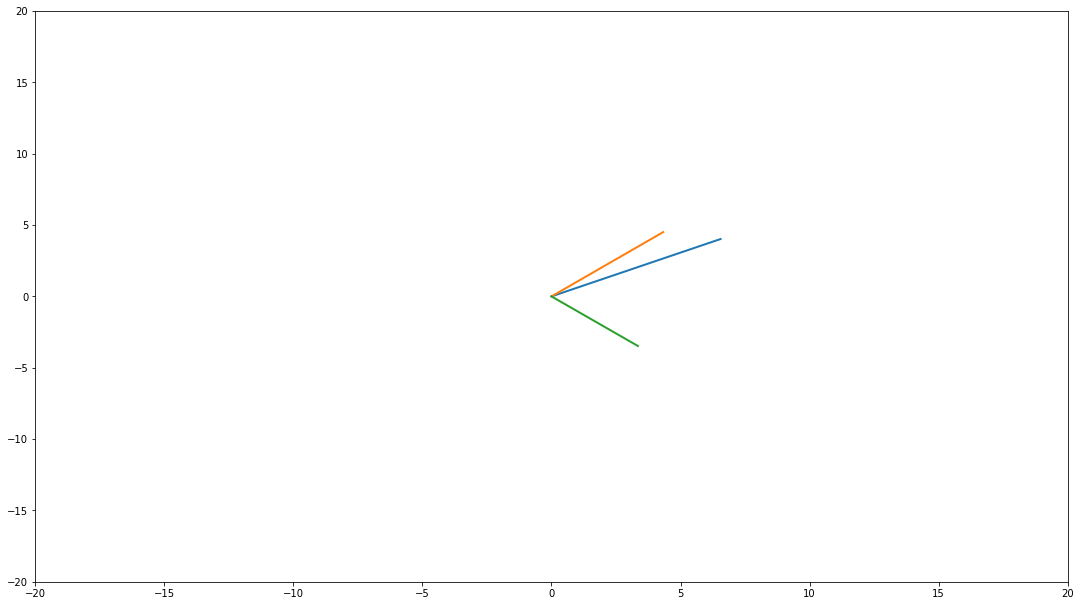

In [118]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = plt.axes(xlim=(-20, 20), ylim=(-20, 20))
line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
line3, = ax.plot([], [], lw=2)

frame_num = states.shape[0]
particles = np.array([
    states[:,0,1], #body 1, px
    states[:,0,2], #body 1, py
    states[:,1,1], #body 2, px
    states[:,1,2], #body 2, py
    states[:,2,1], #body 3, px
    states[:,2,2]  #body 3, py
])

# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return [line1, line2, line3]

x1, x2, y1, y2, x3, y3 = [], [], [], [], [], []
# animation function.  This is called sequentially
def animate(i):
    x1.append(particles[0][i])
    y1.append(particles[1][i])
    x2.append(particles[2][i])
    y2.append(particles[3][i])
    x3.append(particles[4][i])
    y3.append(particles[5][i])
    
    line1.set_data(x1, y1)
    line2.set_data(x2, y2)
    line3.set_data(x3, y3)
    
    return [line1, line2, line3]

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frame_num, interval=20, blit=True)

anim.save('solve_rk4.mp4')
plt.show()

In [ ]:
states.shape

In [ ]:
particles = np.array([
    states[:,0,1], #body 1, px
    states[:,0,2], #body 1, py
    states[:,1,1], #body 2, px
    states[:,1,2], #body 2, py
    states[:,2,1], #body 3, px
    states[:,2,2]  #body 3, py
])

In [ ]:
np.()